<a href="https://colab.research.google.com/github/AditiG10/Classification-of-COVID-19-chest-X-ray-images/blob/master/VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

seed = 232
np.random.seed(seed)

Using TensorFlow backend.


In [ ]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!git clone https://github.com/vaibhavG321/Classification-of-COVID-19-chest-X-ray-images

Cloning into 'Classification-of-COVID-19-chest-X-ray-images'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 664 (delta 1), reused 2 (delta 0), pack-reused 656
Receiving objects: 100% (664/664), 222.69 MiB | 13.12 MiB/s, done.
Resolving deltas: 100% (29/29), done.
Checking out files: 100% (698/698), done.


In [ ]:
cd Classification-of-COVID-19-chest-X-ray-images 

/content/Classification-of-COVID-19-chest-X-ray-images


In [ ]:
cd dataset

/content/Classification-of-COVID-19-chest-X-ray-images/dataset


In [ ]:
input_dir = "/content/Classification-of-COVID-19-chest-X-ray-images/dataset/"
train_dir = "/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training"
test_dir = "/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing"
val_dir = "/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation"

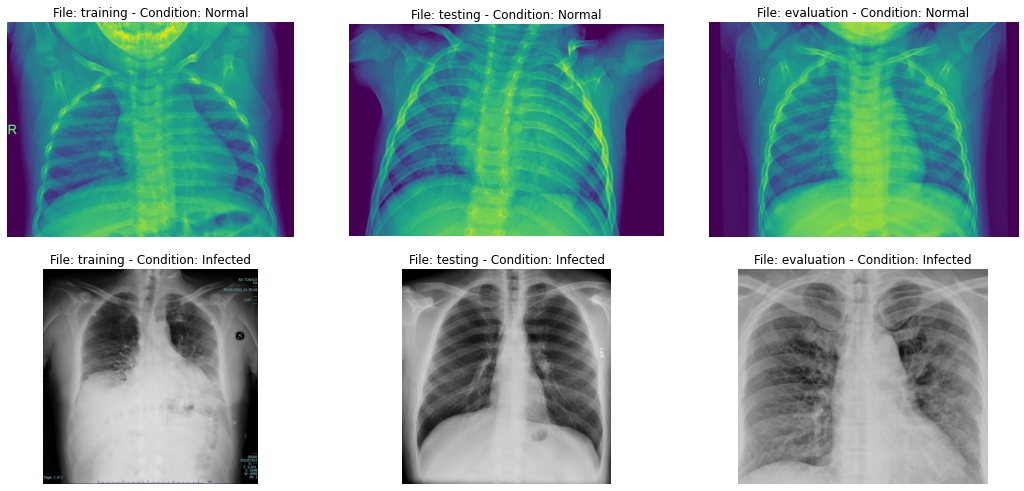

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(15,7))
ax = ax.ravel()
plt.tight_layout()
for i, _set in enumerate(['training','testing','evaluation']):
    set_path = input_dir+_set
    ax[i].axis('off')
    ax[i].imshow(plt.imread(set_path+'/normal/'+os.listdir(set_path+'/normal')[0]))
    ax[i].set_title('File: {} - Condition: Normal'.format(_set))
    ax[i+3].axis('off')
    ax[i+3].imshow(plt.imread(set_path+'/infected/'+os.listdir(set_path+'/infected')[0]))
    ax[i+3].set_title('File: {} - Condition: Infected'.format(_set))

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=8,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=8,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=8,
        class_mode='binary')

Found 593 images belonging to 2 classes.
Found 2 images belonging to 2 classes.
Found 94 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.applications import VGG16
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.utils.np_utils import to_categorical
from keras.layers import  Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator,image,img_to_array,load_img

In [ ]:
# Create VGG16 Model with Keras library

def build_model(backbone, lr=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['acc']
    )
    return model
vgg16 = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

model = build_model(vgg16 ,lr = 1e-4)
model.summary()

58892288/58889256 [==============================] - 5s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 14,717,249
Trainable params: 14,716,225
Non-trainable params: 1,024
_________________________________________________________________


In [12]:
# Fit Model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=test_generator,
    validation_steps=10
)

Epoch 1/10
100/100 [==============================] - 1483s 15s/step - loss: 0.3237 - acc: 0.8651 - val_loss: 0.2807 - val_acc: 0.8625
Epoch 2/10
100/100 [==============================] - 1468s 15s/step - loss: 0.2494 - acc: 0.9160 - val_loss: 0.0125 - val_acc: 0.9872
Epoch 3/10
100/100 [==============================] - 1482s 15s/step - loss: 0.1966 - acc: 0.9332 - val_loss: 0.4004 - val_acc: 0.9359
Epoch 4/10
100/100 [==============================] - 1492s 15s/step - loss: 0.1903 - acc: 0.9369 - val_loss: 0.0245 - val_acc: 1.0000
Epoch 5/10
100/100 [==============================] - 1472s 15s/step - loss: 0.1538 - acc: 0.9529 - val_loss: 0.2595 - val_acc: 0.9615
Epoch 6/10
100/100 [==============================] - 1489s 15s/step - loss: 0.2156 - acc: 0.9155 - val_loss: 0.0242 - val_acc: 1.0000
Epoch 7/10
100/100 [==============================] - 1473s 15s/step - loss: 0.1665 - acc: 0.9453 - val_loss: 0.0756 - val_acc: 1.0000
Epoch 8/10
100/100 [==============================] - 1

In [13]:
score = model.evaluate_generator(test_generator,verbose=1)
print("The accuracy is ",score[1])

12/12 [==============================] - 47s 4s/step
The accuracy is  0.978723406791687


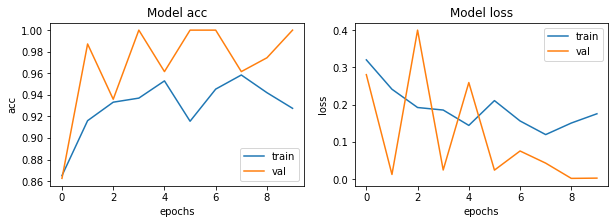

In [14]:
# Visualize Loss and Accuracy Rates
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['acc', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [23]:
# model save
model.save_weights("cnn-covid-19-xray-vgg16.h5")

In [25]:
import random 
import glob

In [27]:
def choose_image_and_predict():
    normal_or_covid = ['normal', 'covid']
    folder_choice = (random.choice(normal_or_covid))
    
    covid_images = glob(r'/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/'+folder_choice+'/*')
    img_choice = (random.choice(covid_images))

    img = load_img(img_choice, target_size=(224, 224))
    img = img_to_array(img)
    plt.imshow(img / 255.)
    x = preprocess_input(np.expand_dims(img.copy(), axis=0))
    pred_class = model.predict_classes(x)
    pred = model.predict(x)
    print("Actual class:", folder_choice)
    if pred_class[0] == 0:
        print("Predicted class: normal")
        print("Likelihood:", pred[0][0].round(4))
        if pred[0][0].round(4) < 0.8:
            print("WARNING, low confidence")
    else:
        print("Predicted class: covid")
        print('Likelihood:', pred[0][1].round(4))
        if pred[0][1].round(4) < 0.8:
            print("WARNING, low confidence")        
        
choose_image_and_predict()

TypeError: ignored